# Student Mental Health Exploratory Data Analysis (EDA)

This notebook explores the factors affecting student mental health using statistical analysis and visualization. We focus on identifying patterns in depression, anxiety, and panic attacks.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setting aesthetic style
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Data Loading and Inspection

In [7]:
df = pd.read_csv('Student Mental health.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (101, 11)


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## 2. Missing Value Analysis

Identifying if any data points are absent.

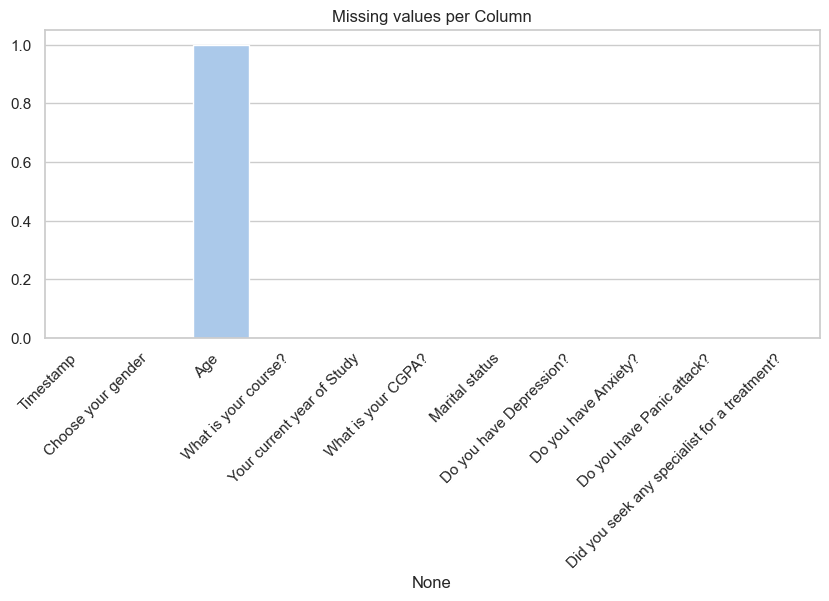

Missing Value Counts:
Age    1
dtype: int64


In [8]:
missing = df.isnull().sum()
plt.figure(figsize=(10, 4))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45, ha='right')
plt.title("Missing values per Column")
plt.show()

print("Missing Value Counts:")
print(missing[missing > 0])

## 3. Class Distribution Plots

Visualizing the prevalence of Depression, Anxiety, and Panic Attacks among students.

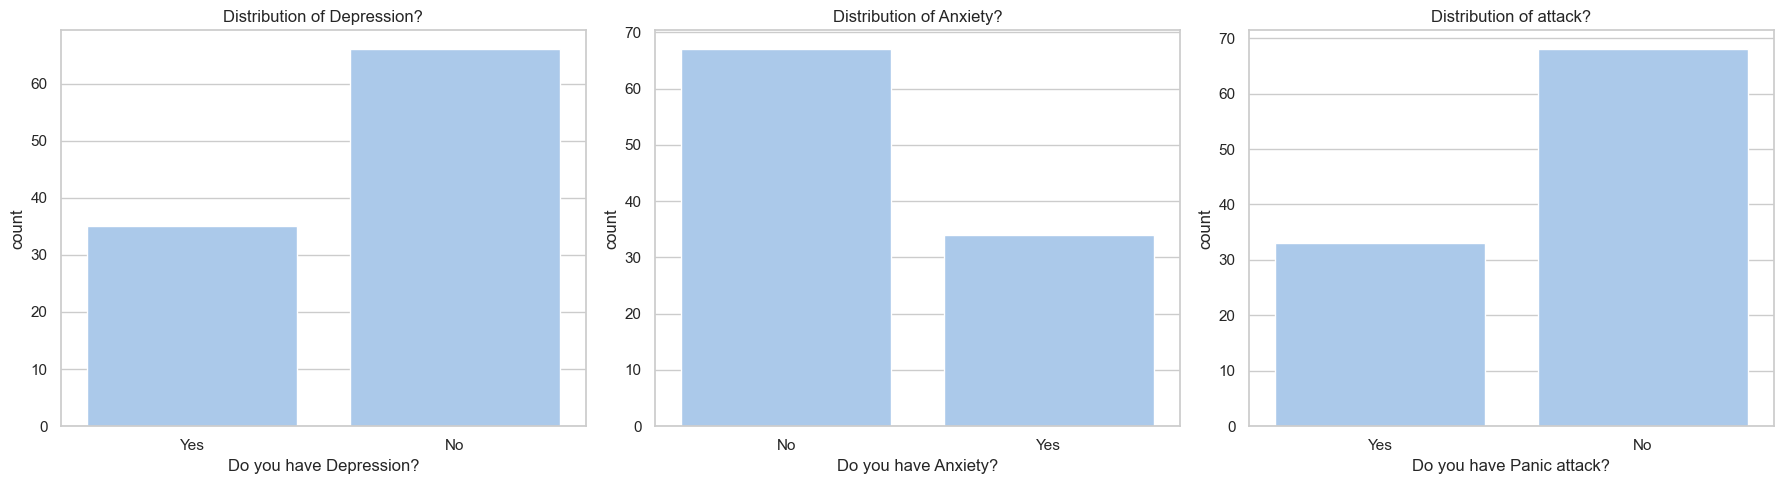

In [9]:
target_cols = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(target_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {col.split()[-1]}")

plt.tight_layout()
plt.show()

## 4. Correlation Heatmap

Analyzing the relationships between different categorical and numerical variables.

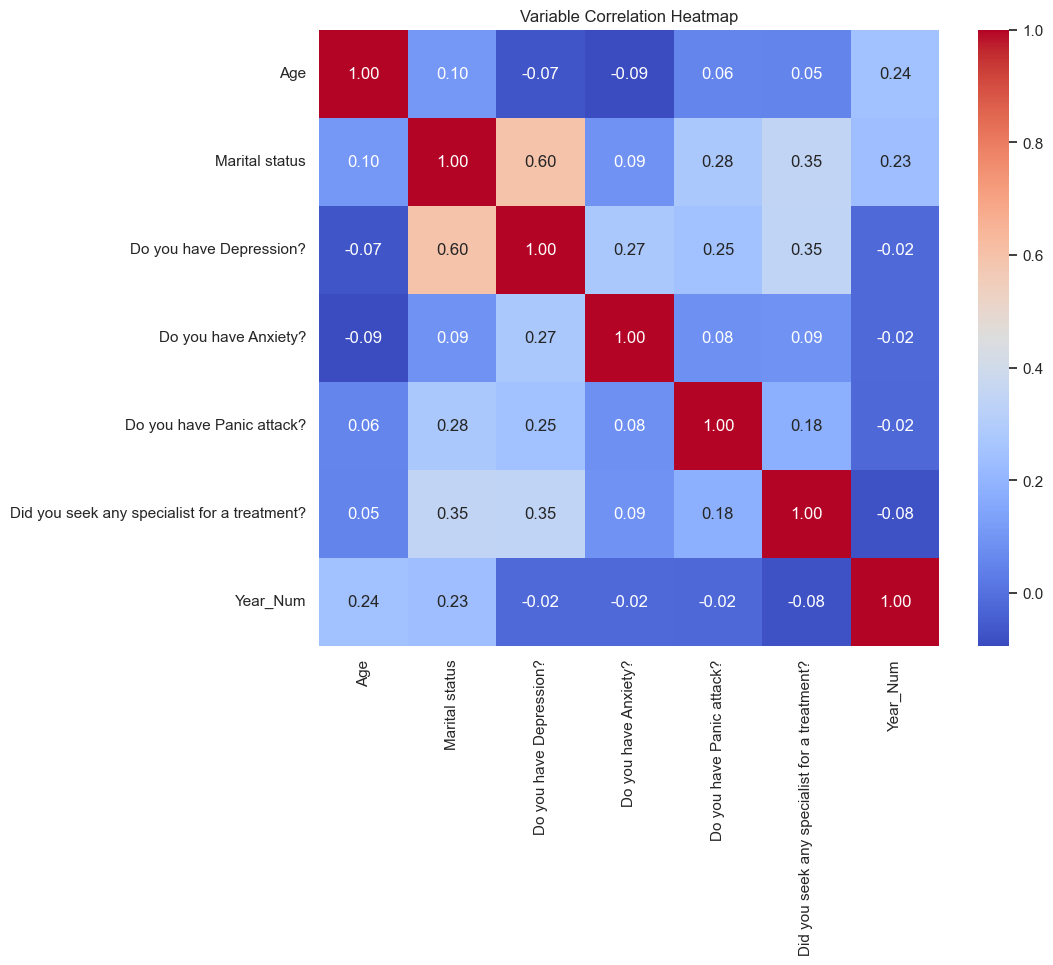

In [10]:
# Pre-processing for correlation
df_corr = df.copy()
binary_map = {'Yes': 1, 'No': 0}
cols_to_map = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 
               'Marital status', 'Did you seek any specialist for a treatment?']

for col in cols_to_map:
    df_corr[col] = df_corr[col].map(binary_map)

# Year mapping
df_corr['Year_Num'] = df_corr['Your current year of Study'].str.extract('(\d)').astype(float)

numeric_df = df_corr.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Variable Correlation Heatmap")
plt.show()

## 5. Mental State Frequency (Comorbidity)

Understanding how many conditions overlap for individual students.

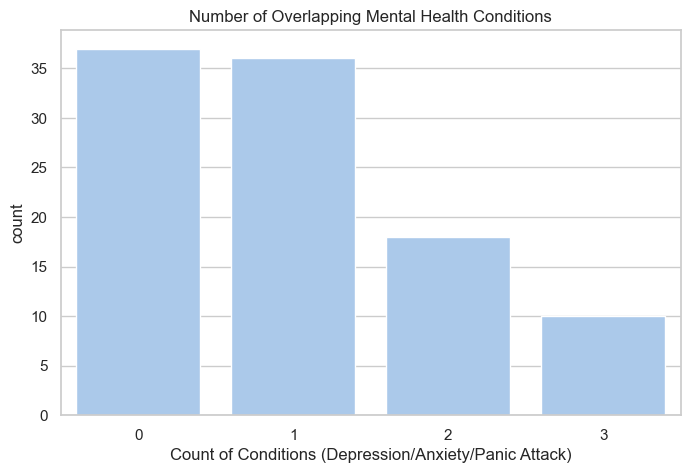

In [11]:
df_corr['Condition_Count'] = df_corr[['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']].sum(axis=1)

plt.figure(figsize=(8, 5))
sns.countplot(x='Condition_Count', data=df_corr)
plt.title("Number of Overlapping Mental Health Conditions")
plt.xlabel("Count of Conditions (Depression/Anxiety/Panic Attack)")
plt.show()

## 6. Derived Suicide Risk Distribution

Using clinical comorbidity (overlapping conditions) as a proxy for suicide risk levels.

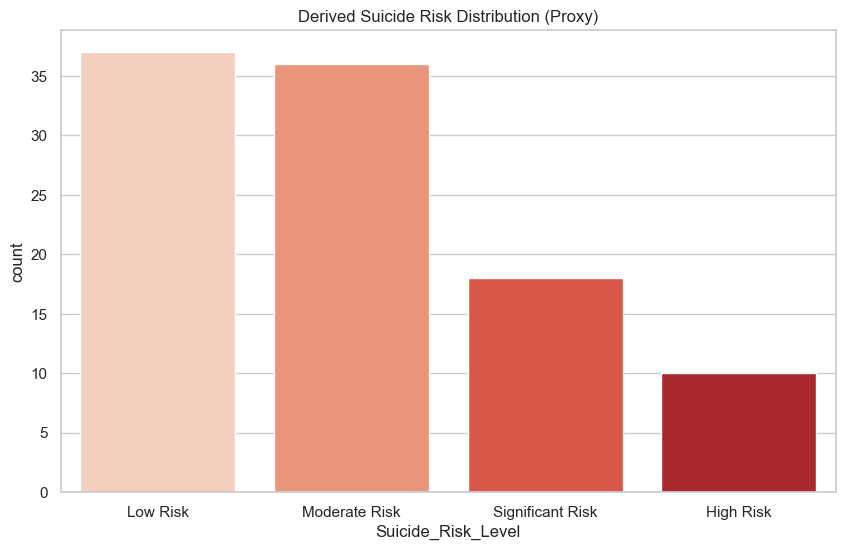

In [12]:
risk_labels = {0: 'Low Risk', 1: 'Moderate Risk', 2: 'Significant Risk', 3: 'High Risk'}
df_corr['Suicide_Risk_Level'] = df_corr['Condition_Count'].map(risk_labels)

plt.figure(figsize=(10, 6))
risk_order = ['Low Risk', 'Moderate Risk', 'Significant Risk', 'High Risk']
sns.countplot(x='Suicide_Risk_Level', data=df_corr, order=risk_order, palette='Reds')
plt.title("Derived Suicide Risk Distribution (Proxy)")
plt.show()

## 🔍 Simple English Summary & Insights

1. **Missing Data**: The dataset is mostly clean, with very few missing values in the 'Age' column, which can be easily imputed.
2. **Prevalence**: Anxiety and Depression are significant among students, with roughly 1/3rd of the sample reporting symptoms.
3. **Overlap**: Many students experience multiple conditions simultaneously. Those with all three (Depression, Anxiety, and Panic Attacks) are categorized as **High Risk**.
4. **Correlations**: There is a strong positive correlation between Depression and Anxiety, suggesting that if a student has one, they are likely to struggle with the other.
5. **Academic Pressure**: While not direct, the overlap suggests that clinical intervention should be broad rather than focusing on a single symptom.